# Data Cleaning for E-commerce customer support satisfactory Data Set
In this notebook, we will do the data cleaning and preparation on the customer service data taken from:

https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import math


## Import dataset

In [2]:
df = pd.read_csv("Customer_support_data.csv")

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28756 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

## Check for duplicate tuples

In [3]:
df.duplicated().sum()

0

## Check for missing values

In [4]:
df.isnull().sum()


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57151
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

At first glance, there are a lot of null values for the variables\
Customer Remarks:           57151\
Order_id:                   18232\
order_date_time:            68693

Customer_City:              68828\
Product_category:           68711\
Item_price:                 68701\
connected_handling_time:    85665


## order_date_time

In [5]:
df1=pd.DataFrame(df[df["order_date_time"].isnull()&~df["Order_id"].isnull()])

df1[~df1["Customer Remarks"].isnull()].sample(8)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
48549,1cbccacb-9e3f-4148-be7c-13f09c52eff7,Inbound,Returns,Reverse Pickup Enquiry,Good,09f504a5-0936-436a-9303-185566039262,NaN,18/08/2023 06:09,18/08/2023 06:12,18-Aug-23,NaN,NaN,NaN,NaN,Michael Newman,Landon Tanaka,John Smith,>90,Split,5
83768,0078ec8b-1f65-41f6-946a-069aa8857dda,Inbound,Returns,Damaged,good,0e50cf29-7e0c-4a46-858a-f2b0c90b8391,NaN,31/08/2023 08:41,31/08/2023 08:46,31-Aug-23,NaN,NaN,NaN,NaN,Ashley Ferguson,Austin Johnson,William Kim,On Job Training,Morning,5
11390,e9891801-90f2-4c22-801f-135a22ac6b98,Inbound,Order Related,Delayed,"Every thing is alright, But I think there shou...",8abb51a7-a8c1-405f-9c7c-69ea643cc189,NaN,05/08/2023 20:44,05/08/2023 21:04,05-Aug-23,NaN,NaN,NaN,NaN,Gina Richards,Logan Lee,Emily Chen,61-90,Evening,5
1436,3cbf9340-a49f-4e38-9920-bdd0e20ccd3b,Inbound,Returns,Reverse Pickup Enquiry,Good,8317c205-64c4-4ff2-8e5c-4b624d38331f,NaN,02/08/2023 16:24,02/08/2023 20:36,02-Aug-23,NaN,NaN,NaN,NaN,Kelly Carpenter,William Park,John Smith,61-90,Evening,5
57095,901f512c-99d2-430c-998b-112f69ac436f,Email,Returns,Service Centres Related,My problem is not solved,a39eb7d1-2d5d-474e-b155-f2015163f740,NaN,21/08/2023 20:31,22/08/2023 10:42,22-Aug-23,NaN,NaN,NaN,NaN,Dawn Copeland,Jacob Sato,Emily Chen,0-30,Evening,1
17754,408bc40e-cc95-46ba-820e-6c766f1a0372,Inbound,Refund Related,Refund Related Issues,No,2d85f42a-6801-4448-9361-49bd97f270df,NaN,09/08/2023 18:01,09/08/2023 18:04,09-Aug-23,NaN,NaN,NaN,NaN,Tiffany Smith,Mia Patel,Emily Chen,61-90,Evening,1
14928,de7afa41-e230-4263-affa-8c092f71616e,Inbound,Refund Related,Refund Enquiry,ok,07c019fd-bb8b-42f8-bb05-39e89d047140,NaN,07/08/2023 11:17,07/08/2023 11:18,07-Aug-23,NaN,NaN,NaN,NaN,Matthew Mendoza MD,William Park,John Smith,61-90,Evening,5
51676,0ac50ffa-de0e-4a83-9fec-987f38f51c40,Email,Order Related,Delayed,strive to be the best in the market,87689790-4a3a-4df8-96e3-6396bb55b16b,NaN,20/08/2023 07:37,20/08/2023 07:41,20-Aug-23,NaN,NaN,NaN,NaN,Kimberly Rogers,Scarlett Chen,John Smith,0-30,Morning,5


In [6]:
df1["category"].unique()

array(['Product Queries', 'Order Related', 'Returns', 'Cancellation',
       'Shopzilla Related', 'Payments related', 'Refund Related',
       'Feedback', 'Offers & Cashback', 'Onboarding related',
       'App/website', 'Others'], dtype=object)

order_date_time columns seem to  have similar number of null values as product category and item price, will check all 3 of them together to see if there is any visible relationship. 

In [7]:
df5 = df[df["Product_category"].notnull() & df["Item_price"].notnull() & df["order_date_time"].notnull()]
len(df5)

17196

In [8]:
df5 = df[(df["Product_category"].isnull() | df["Item_price"].isnull()) & df["order_date_time"].notnull()]
len(df5)

18

In [9]:
df5["category"].unique()

array(['Feedback', 'Offers & Cashback', 'Returns', 'Order Related',
       'Refund Related', 'Cancellation'], dtype=object)

In [10]:
df5["Customer Remarks"].unique()

array([nan, 'Lawra ka servy',
       'I buy filmora 12 software. the delevery date was 12 august, today is 18 august but the softwere not provide to me.',
       "Customer support don't have actual solution. They Just make customer fool. Nothing more they can do",
       'Not happy'], dtype=object)

the attribute order_date_time seem to indicate an actual order being made, and it is tied to an item price and a product category. However, there exists 18 rows from the data set which has non-null values for order_date_time but some null values for product category and item price. Should remove these rows as they might be improperly filled or somme sort of bug in the system could have occurred based on the few customer remarks.

In [11]:
df = df[~((df["Product_category"].isnull() | df["Item_price"].isnull()) & df["order_date_time"].notnull())]

In [12]:
df = df.reindex()

additionally add a new binary attribute Order_made showing 1 if order_date_time is non null value and 0 otherwise 

In [13]:
df['Order_made'] = df['order_date_time'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [14]:
df.sample(8)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made
43389,282a627e-76d6-417b-8db2-fa9fe3dd54e2,Inbound,Returns,Reverse Pickup Enquiry,Best,1b9ed829-78db-42ed-ae9d-e8af28e42783,NaN,17/08/2023 16:51,17/08/2023 16:53,17-Aug-23,...,NaN,NaN,NaN,Elizabeth Lara,Dylan Kim,Michael Lee,>90,Morning,5,0
8292,d74bdc9a-3686-4527-beb0-31cba80ba84e,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,04/08/2023 16:27,04/08/2023 16:37,04-Aug-23,...,NaN,NaN,NaN,Joseph Benson,Brayden Wong,Michael Lee,>90,Afternoon,5,0
54139,8277cb9c-b4b6-457a-b67f-40248650ffb0,Inbound,Feedback,UnProfessional Behaviour,NaN,13dfe038-27e6-4481-87f0-4fbc7d78181b,NaN,21/08/2023 12:21,21/08/2023 12:23,21-Aug-23,...,NaN,NaN,NaN,Laura Patel,Landon Tanaka,Jennifer Nguyen,On Job Training,Evening,4,0
30089,4c8d0903-eb63-4df9-8ad9-1a28b54b8993,Inbound,Returns,Reverse Pickup Enquiry,NaN,d52fdab7-b765-4393-b718-37b6f3dcb2fe,04/08/2023 13:38,11/08/2023 13:45,11/08/2023 13:47,11-Aug-23,...,LifeStyle,332.0,NaN,Thomas Waters,Sophia Sato,John Smith,>90,Afternoon,5,1
39025,ba3a8fff-8f6c-47ba-9b38-59a891ca1317,Inbound,Returns,Return request,NaN,NaN,NaN,14/08/2023 17:02,14/08/2023 17:05,14-Aug-23,...,NaN,NaN,NaN,Robert Oneal,Brayden Wong,Michael Lee,>90,Afternoon,5,0
59638,0106cc96-4142-4510-ad8f-9c5b439615b7,Outcall,Order Related,Customer Requested Modifications,Happy,18febc20-a278-4270-b1ac-c3d366772afd,NaN,23/08/2023 14:18,23/08/2023 14:20,23-Aug-23,...,NaN,NaN,NaN,Caitlin Johnson,Evelyn Kimura,John Smith,0-30,Morning,5,0
49585,7a4ec9af-e1bb-4559-909a-b6c17a7b4bf7,Inbound,Returns,Service Centres Related,NaN,461f818c-7214-464b-8cc0-20c149bf3134,NaN,18/08/2023 11:53,18/08/2023 11:56,18-Aug-23,...,NaN,NaN,NaN,Rebecca James,Brayden Wong,John Smith,61-90,Morning,5,0
71879,6d7860e1-cf21-4f4e-8afa-a31e3ab042e3,Inbound,Order Related,Priority delivery,Good jon,NaN,NaN,27/08/2023 16:04,27/08/2023 16:07,27-Aug-23,...,NaN,NaN,NaN,David Perez,Lily Chen,Michael Lee,>90,Evening,5,0


## Customer Remarks

In [15]:
df2 = pd.DataFrame(df[df["Customer Remarks"].notnull()])

In [16]:
df2.sample(8)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made
70750,6351cb2b-aca1-445a-9053-7caca38a1d22,Inbound,Returns,Exchange / Replacement,Please provide details on time..call hold time...,4b50a870-da0b-4867-a1a8-1b0aea85e6e2,03/08/2023 23:56,27/08/2023 00:00,27/08/2023 00:01,27-Aug-23,...,Mobile,9999.0,NaN,Cheryl Rice,Lucas Singh,John Smith,>90,Evening,5,1
36976,a0220be8-01fe-49a9-abf8-77c927a37517,Inbound,Order Related,Order status enquiry,order woo deke jao pehle,5089b4a2-77f5-404b-a439-2c1222196a4e,03/08/2023 19:33,14/08/2023 14:14,14/08/2023 14:57,14-Aug-23,...,Mobile,7299.0,NaN,Rebecca Graham,Alexander Tanaka,Michael Lee,0-30,Evening,4,1
44423,d89a42e9-5b4b-49b0-9cec-7cde20660a34,Inbound,Returns,Return request,Need to carefull about order placed by customer,459372d0-4a3e-457c-a603-aaf02035c47a,NaN,17/08/2023 17:36,17/08/2023 17:47,17-Aug-23,...,NaN,NaN,NaN,Adam Torres,Ethan Tan,Michael Lee,31-60,Evening,5,0
80870,7a56b348-e949-46aa-8f78-5fce5c511c1d,Inbound,Order Related,Installation/demo,Thankyou,b4618262-57fa-469e-b820-cb6b68bb3eda,NaN,30/08/2023 02:47,30/08/2023 02:57,30-Aug-23,...,NaN,NaN,NaN,Omar Odonnell,Nathan Patel,John Smith,>90,Split,5,0
70276,c9b1c813-225e-4ac4-8be9-38518b7ee859,Inbound,Returns,Technician Visit,Technicain visit unsuccesful more times,ac6d6071-bcd0-4afe-8db1-8ed94c8fb532,17/07/2023 12:46,26/08/2023 08:48,26/08/2023 08:50,26-Aug-23,...,Electronics,27990.0,NaN,Ms. Karen Moore,Evelyn Kimura,John Smith,0-30,Morning,1,1
39192,475be5bc-4156-4902-9aef-84519224978e,Inbound,Returns,Reverse Pickup Enquiry,Bad,NaN,NaN,14/08/2023 16:49,14/08/2023 16:56,14-Aug-23,...,NaN,NaN,NaN,Laura Pratt,Emma Park,John Smith,0-30,Morning,1,0
27607,02b59bb9-e1e1-4132-b245-6c14bd037493,Outcall,Returns,Technician Visit,Very bad experience regarding electronic goods...,NaN,NaN,13/08/2023 21:52,13/08/2023 22:03,13-Aug-23,...,NaN,NaN,NaN,Connor Jackson,Ethan Tan,Michael Lee,31-60,Evening,1,0
66875,154c8855-1b03-473e-8c52-f4777cda76a7,Email,Shopzilla Related,General Enquiry,Hhj,d99d8668-975c-470a-8386-96ffeadeae01,NaN,25/08/2023 14:45,25/08/2023 14:53,25-Aug-23,...,NaN,NaN,NaN,Samuel Hanson,Alexander Tanaka,Michael Lee,0-30,Evening,5,0


Customer remarks could be used by some machine learning method later on. We will keep it for now, but add another feature "remarks_length".

In [17]:
df["remarks_length"] = df["Customer Remarks"].str.len()

In [18]:
df[["Customer Remarks","remarks_length"]].sample(10)

,Customer Remarks,remarks_length
78307,NaN,NaN
39283,NaN,NaN
54695,NaN,NaN
8237,NaN,NaN
2032,Good customer care service,27.0
29749,NaN,NaN
443,NaN,NaN
78867,NaN,NaN
49111,NaN,NaN
83423,NaN,NaN


In [19]:
df["remarks_length"] = df["remarks_length"].replace(to_replace = np.nan, value =0)
df[["Customer Remarks","remarks_length"]].sample(10)

,Customer Remarks,remarks_length
61289,NaN,0.0
30048,NaN,0.0
70425,NaN,0.0
82575,Very good,10.0
10106,NaN,0.0
84894,NaN,0.0
24826,NaN,0.0
6731,Nice voice,11.0
27861,Good,4.0
56705,????????????,12.0


## Order_id

In [20]:
df.sample(8)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length
27616,ce861a35-1635-45fa-b746-d1948cd63615,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,12/08/2023 17:43,12/08/2023 17:45,12-Aug-23,...,NaN,NaN,Melinda Montgomery,Landon Tanaka,Emily Chen,61-90,Split,4,0,0.0
61230,c2ef3802-f9d3-4878-b150-fa57eb7a8f0d,Email,Order Related,Delayed,NaN,7d20ed1d-4c96-485b-b105-3e5a106d56ed,09/08/2023 22:47,23/08/2023 09:33,23/08/2023 09:52,23-Aug-23,...,1499.0,NaN,Jacob Mitchell,Scarlett Chen,John Smith,0-30,Morning,4,1,0.0
63422,7d6986c0-7ba1-42f9-9c84-ced90f5f5041,Outcall,Returns,Reverse Pickup Enquiry,NaN,dd5ad018-9a69-4278-bb2d-30c6497bd643,NaN,24/08/2023 17:39,24/08/2023 17:43,24-Aug-23,...,NaN,NaN,John Rivera,Zoe Yamamoto,John Smith,>90,Afternoon,5,0,0.0
54875,8b457dc5-cd1f-4bd8-9496-281a5a599274,Inbound,Returns,Service Centres Related,NaN,54d46ac9-a66e-45ae-bbf5-8472269bf972,09/06/2023 20:22,20/08/2023 20:26,21/08/2023 19:18,21-Aug-23,...,15999.0,NaN,Anthony Cook,Noah Patel,Michael Lee,31-60,Night,2,1,0.0
59540,fb0cf4f0-f836-4121-8d00-d1d2f14e4ae5,Outcall,Order Related,Installation/demo,All good no problem,2a68ff49-f60b-4019-a12b-37a2fdbcc369,NaN,23/08/2023 22:54,23/08/2023 22:56,23-Aug-23,...,NaN,NaN,Tammy Brewer,Layla Taniguchi,Emily Chen,>90,Morning,5,0,20.0
81930,bad4fa28-cfe2-4163-a95f-72818fc546c8,Inbound,Returns,Wrong,NaN,3bbd7389-25e6-4e9b-9c15-12501033f063,NaN,29/08/2023 23:03,30/08/2023 00:57,30-Aug-23,...,NaN,NaN,Scott Shaffer,Charlotte Suzuki,William Kim,On Job Training,Morning,5,0,0.0
68600,6d76f5a9-95c1-4755-9ed2-6fa705132395,Inbound,Returns,Reverse Pickup Enquiry,NaN,e0af4474-7a8e-4215-8df0-a43c22e911f8,NaN,26/08/2023 12:09,26/08/2023 12:10,26-Aug-23,...,NaN,NaN,Devon Daniel,Olivia Wang,Olivia Tan,0-30,Afternoon,5,0,0.0
62016,fa518c10-ba10-4d59-95c7-50b0978e11b0,Inbound,Order Related,Delayed,NaN,97968714-0a5b-4658-8465-f5611b3204b8,11/08/2023 13:08,23/08/2023 16:05,23/08/2023 16:08,23-Aug-23,...,241.0,NaN,Timothy Fernandez,Madison Kim,John Smith,31-60,Morning,5,1,0.0


In [21]:
print(df["Order_id"].isnull().value_counts())

False    67657
True     18232
Name: Order_id, dtype: int64


In [22]:
print(type(df["Order_made"]))

<class 'pandas.core.series.Series'>


Comparing Order_made and Order_id

In [23]:
filtered_df = df[(df["Order_made"] == 1) & (df["Order_id"].isnull())]
# order_made == 0 AND order_id == null
len(filtered_df)

0

In [24]:
filtered_df = df[(df["Order_made"] == 0) & (df["Order_id"].isnull())]
# order_made == 0 AND order_id == null
len(filtered_df)

18232

In [25]:
filtered_df = df[(df["Order_made"] == 1) & (df["Order_id"].notnull())]
# order_made == 1 AND order_id != null
len(filtered_df)

17196

In [26]:
filtered_df = df[(df["Order_made"] == 0) & (df["Order_id"].notnull())]
# order_made == 0 AND order_id != null
len(filtered_df)

50461


every order id that is null has ordermade = 0,\
every order made, there might be a non-null order id value,\
from that, order_id seem like an arbitrary unique id, we should remmove it.

In [27]:
df = pd.DataFrame(df.drop("Order_id",axis=1))
df.sample(8)

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,...,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length
2301,07f5bc9b-9336-42da-907c-8da26cbaca9f,Inbound,Returns,Missing,out of two cancelled orders only one is addressed,NaN,02/08/2023 14:05,02/08/2023 15:23,02-Aug-23,NaN,...,NaN,NaN,William Little MD,Evelyn Kimura,John Smith,0-30,Morning,3,0,49.0
25024,d270d149-69a1-49da-ae9d-6719ca21243d,Inbound,Returns,Reverse Pickup Enquiry,Very good,NaN,10/08/2023 10:46,10/08/2023 10:52,10-Aug-23,NaN,...,NaN,NaN,Andrea Oconnor,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,10.0
15361,fd523cd2-0404-40d6-a156-118586ddf6f5,Inbound,Returns,Fraudulent User,Excellent,NaN,07/08/2023 09:51,07/08/2023 09:53,07-Aug-23,NaN,...,NaN,NaN,Dawn Boyd,Olivia Suzuki,John Smith,31-60,Morning,5,0,9.0
13896,08a3b65e-d731-4037-9557-06f3da6a832b,Inbound,Order Related,Order status enquiry,Very worse service,30/07/2023 16:58,06/08/2023 16:45,06/08/2023 17:54,06-Aug-23,BEED,...,4299.0,NaN,Desiree Newton,Emma Park,John Smith,0-30,Morning,1,1,19.0
58054,9f5c17c3-d388-4de4-bfa8-14ae983c9d16,Inbound,Order Related,Installation/demo,Thank you Shopzilla,NaN,22/08/2023 15:45,22/08/2023 15:57,22-Aug-23,NaN,...,NaN,NaN,Elizabeth Collins,Madison Kim,Michael Lee,31-60,Evening,5,0,20.0
40308,1726e879-161b-4b5e-8371-fe6d3dae2427,Inbound,Order Related,Delayed,NaN,NaN,15/08/2023 16:44,15/08/2023 16:53,15-Aug-23,NaN,...,NaN,NaN,Lindsay Campbell,Noah Patel,Michael Lee,31-60,Evening,5,0,0.0
3876,d0d2ea5b-8cb5-4d21-a872-89bce0b24581,Inbound,Product Queries,Product Specific Information,NaN,NaN,02/08/2023 12:45,02/08/2023 17:33,02-Aug-23,NaN,...,NaN,NaN,James Mcgee,Madison Kim,John Smith,>90,Morning,5,0,0.0
23543,c28f7a2b-4932-4b57-bbee-44346c504dd4,Inbound,Returns,Exchange / Replacement,NaN,NaN,10/08/2023 11:20,10/08/2023 11:56,10-Aug-23,NaN,...,NaN,NaN,James Howard,Ethan Nakamura,Jennifer Nguyen,On Job Training,Morning,4,0,0.0


## Customer_City

In [28]:
df["Customer_City"].unique()

array([nan, 'NAGPUR', 'RANCHI', ..., 'NAWALGARH', 'VALPOI', 'DORAHA'],
      dtype=object)

In [29]:
df[df["Customer_City"].isnull()]

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,...,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,...,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,...,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,...,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,...,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,...,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,...,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4,0,0.0
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,...,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5,0,40.0
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,...,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5,0,36.0
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,...,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4,0,0.0


drop customer city as more than 2/3 of the rows are null values and it shouldnt affect the CSAT score since the customer are from the same country

In [30]:
df = pd.DataFrame(df.drop(["Customer_City"],axis=1))
df.sample(8)

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length
27297,73446d6f-7ca2-4617-bffb-57c17c93ae17,Inbound,Feedback,UnProfessional Behaviour,NaN,06/08/2023 17:05,12/08/2023 00:41,12/08/2023 00:47,12-Aug-23,Books & General merchandise,45.0,NaN,Sarah Thomas,Logan Lee,Emily Chen,61-90,Evening,5,1,0.0
78317,4163e138-7f88-4498-b765-959400b5cd65,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,29/08/2023 02:07,29/08/2023 02:11,29-Aug-23,NaN,NaN,NaN,Donna Lee,Sophia Sato,Jennifer Nguyen,On Job Training,Morning,4,0,0.0
35592,d20345b2-6cdb-4830-8aef-83b3943047a4,Inbound,Returns,Return request,NaN,NaN,14/08/2023 20:10,14/08/2023 21:38,14-Aug-23,NaN,NaN,NaN,Joshua Watson,Noah Patel,Emily Chen,>90,Split,5,0,0.0
22890,243796a6-bc36-49f6-9dcb-7a0153d40709,Inbound,Order Related,Delayed,NaN,31/07/2023 12:55,08/08/2023 08:44,08/08/2023 08:53,08-Aug-23,Electronics,1299.0,NaN,Jamie Smith,Scarlett Chen,John Smith,0-30,Morning,5,1,0.0
65204,bf555fc6-1288-42f0-90de-a53a73eb0103,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,25/08/2023 15:21,25/08/2023 15:28,25-Aug-23,NaN,NaN,NaN,Stacey Lynch,Austin Johnson,Michael Lee,0-30,Morning,5,0,0.0
17971,5692ef8d-d94d-47eb-b0a6-3220d1e5dfd3,Inbound,Returns,Reverse Pickup Enquiry,I am happy,NaN,08/08/2023 17:27,08/08/2023 17:34,08-Aug-23,NaN,NaN,NaN,Elizabeth Lopez,Mia Patel,Emily Chen,>90,Evening,5,0,11.0
13223,33586110-2914-4f2b-803f-70d531e1415d,Inbound,Order Related,Delayed,Satisfied,28/07/2023 13:23,06/08/2023 16:23,06/08/2023 16:25,06-Aug-23,Books & General merchandise,769.0,NaN,Matthew Mendoza MD,William Park,John Smith,61-90,Evening,5,1,9.0
53400,bec93805-2872-4ca6-9065-f7cc7c14bb33,Inbound,Order Related,Installation/demo,NaN,NaN,20/08/2023 11:50,20/08/2023 11:52,20-Aug-23,NaN,NaN,NaN,Melanie Cortez,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0.0


## connected_handling_time

In [31]:
df["connected_handling_time"].unique()

array([  nan,  206.,  303.,  156.,    0.,  240.,  205.,  574.,  514.,
        415.,  368.,  242.,  617.,  439.,  174.,  464.,  330.,  153.,
        722.,  585.,  539., 1115.,  580., 1066.,  865.,  716.,  711.,
        594.,  236.,  957.,  367.,  777.,  604.,  248.,  430.,  605.,
        987.,  476.,  547.,  533.,  541.,  141.,  772.,  355.,  125.,
        233.,  420.,  618.,  424.,  623.,  427.,  335.,  142.,  192.,
        458.,  413.,  645.,  362.,  567.,  384.,  655.,  683.,  640.,
        473.,  217.,  124.,   72.,  311.,  196.,  278.,  673.,  577.,
        460.,  317.,  299.,  229.,  527.,  329.,  171.,  942.,  429.,
        310.,  168.,  557.,  239.,  346.,  418.,  466.,  370.,  568.,
        467.,  509.,  301.,  470.,  253.,  548.,  411.,  383.,  319.,
        398.,  221.,  597.,  371.,  454.,  365.,  849.,  838.,  731.,
       1986.,  396.,  304.,  479.,  496.,  608.,  531.,  475.,  358.,
        349.,  721.,  331.,  587.,  284.,  672.,  265.,  261.,  707.,
        226.,  459.,

In [32]:
df["connected_handling_time"].nunique()

211

drop this column because majority of it are null values.  85665/85907

In [33]:
df = pd.DataFrame(df.drop(["connected_handling_time"],axis=1))
df.sample(8)

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length
48674,48d0f4b4-971e-4311-a6ac-73257575af8d,Inbound,Returns,Fraudulent User,Thank,26/07/2023 20:31,19/08/2023 15:49,19/08/2023 17:00,19-Aug-23,Electronics,1199.0,Samantha Miller,Brayden Wong,John Smith,>90,Evening,5,1,5.0
63352,20917a6b-ee5b-478e-99cc-5d82e317e232,Inbound,Payments related,Payment related Queries,NaN,NaN,23/08/2023 23:36,24/08/2023 00:06,24-Aug-23,NaN,NaN,Elizabeth Rose,Emma Park,John Smith,>90,Morning,5,0,0.0
51964,14990305-7be7-4449-a801-ff83295b7f4f,Inbound,Returns,Return request,NaN,12/08/2023 22:23,20/08/2023 09:43,20/08/2023 09:44,20-Aug-23,LifeStyle,559.0,Robert Miranda,Emma Park,John Smith,31-60,Morning,4,1,0.0
72166,542a8645-1ae9-4789-a66e-6c6b06041896,Outcall,Feedback,UnProfessional Behaviour,NaN,NaN,27/08/2023 09:15,27/08/2023 09:18,27-Aug-23,NaN,NaN,Richard Ortiz,Emily Yamashita,Michael Lee,>90,Morning,5,0,0.0
74269,5d58e76e-8fbc-4701-ac3e-53f3a93cb90c,Outcall,Returns,Reverse Pickup Enquiry,Thanks sir bat karne ham thank you so much...,NaN,28/08/2023 16:35,28/08/2023 00:00,28-Aug-23,NaN,NaN,Robert Smith,Carter Park,Michael Lee,31-60,Morning,5,0,52.0
19944,d5cac092-1226-4539-957a-4f283a84d107,Inbound,Returns,Return request,NaN,NaN,08/08/2023 11:25,08/08/2023 11:26,08-Aug-23,NaN,NaN,Tyler Miller,Emma Park,John Smith,31-60,Morning,5,0,0.0
55312,3aec0b0a-8736-47ee-98c7-e6c2bb3d14db,Inbound,Order Related,Delayed,nothing,12/08/2023 21:44,21/08/2023 08:38,21/08/2023 08:39,21-Aug-23,Books & General merchandise,125.0,Amy Mendez,Sophia Sato,John Smith,0-30,Morning,5,1,8.0
77386,91ecf4fb-967d-4b0a-8ddd-c189db4b5bbe,Inbound,Order Related,Order status enquiry,NaN,NaN,28/08/2023 09:51,28/08/2023 00:00,28-Aug-23,NaN,NaN,Matthew Grimes,Layla Taniguchi,Olivia Tan,>90,Morning,5,0,0.0


In [34]:
df.isnull().sum()

Unique id                   0
channel_name                0
category                    0
Sub-category                0
Customer Remarks        57137
order_date_time         68693
Issue_reported at           0
issue_responded             0
Survey_response_Date        0
Product_category        68693
Item_price              68693
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
Order_made                  0
remarks_length              0
dtype: int64

Next, we take a look at Survey_response_Date, Issue_reported at, issue_responded, \
Issue_reported at and issue_responded both alone cannot be used but we can add a feature, response_time to indicate the time taken by an agent to respond for a customer support ticket.\
With that,  Survey_response_Date is not really useable

In [35]:
timestamp_columns = ["Issue_reported at", "issue_responded", "Survey_response_Date"]
for column in timestamp_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

In [36]:
df["response_time_minutes"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds() / 60


In [37]:
df["response_time_minutes"].describe()

count     85889.000000
mean        331.097114
std       21173.012533
min     -295198.000000
25%           2.000000
50%           5.000000
75%          33.000000
max      177097.000000
Name: response_time_minutes, dtype: float64

<AxesSubplot:xlabel='response_time_minutes', ylabel='Density'>

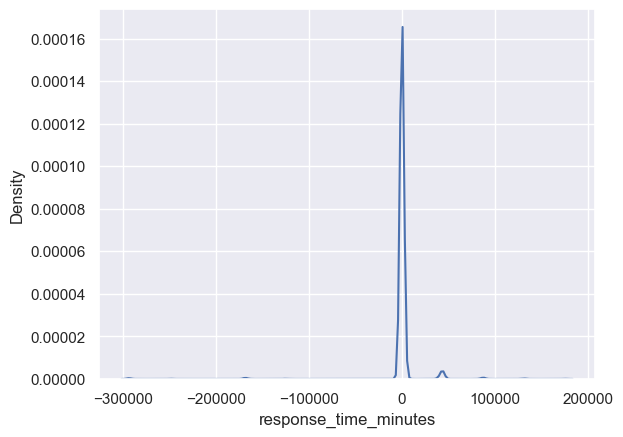

In [38]:
 sb.kdeplot(data=df, x="response_time_minutes")

There appears to be values below 0, which seems impossible

In [39]:
len(df[df["response_time_minutes"]<0])

3721

In [40]:
df[df["response_time_minutes"]<0 & df["issue_responded"].notnull()]

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
50,5f1efb7c-b447-430e-abb3-b20a7f41cb1f,Inbound,Returns,Reverse Pickup Enquiry,NaN,24/07/2023 16:57,2023-07-31 23:58:00,2023-01-08 00:04:00,2023-08-01,Electronics,699.0,David Todd,Noah Patel,Michael Lee,31-60,Evening,4,1,0.0,-295194.0
54,2ad4e1cb-60e8-4a0f-91aa-c253c185ba26,Inbound,Returns,Reverse Pickup Enquiry,NaN,22/07/2023 13:21,2023-07-30 13:15:00,2023-02-08 07:42:00,2023-08-02,LifeStyle,799.0,Colleen Morton,Zoe Yamamoto,John Smith,>90,Afternoon,1,1,0.0,-248013.0
92,ce7c55f1-8072-4f96-ae67-69d2d84be187,Inbound,Returns,Reverse Pickup Enquiry,NaN,12/07/2023 11:42,2023-07-29 18:37:00,2023-01-08 12:54:00,2023-08-01,Books & General merchandise,295.0,Matthew Bennett,Olivia Wang,John Smith,>90,Evening,5,1,0.0,-291223.0
101,079a324c-c827-4142-91bd-7f144935498a,Inbound,Shopzilla Related,Signup Issues,NaN,NaN,2023-07-31 23:03:00,2023-01-08 07:55:00,2023-08-01,NaN,NaN,Brittany Nunez,Emily Yamashita,John Smith,61-90,Evening,5,0,0.0,-294668.0
133,10b123b2-a48f-4738-8d3b-00d9732becce,Inbound,Returns,Technician Visit,Delete in Shopzilla account,21/07/2023 15:09,2023-07-31 23:44:00,2023-01-08 00:17:00,2023-08-01,Electronics,1099.0,Elizabeth Mills,Lucas Singh,John Smith,>90,Evening,1,1,28.0,-295167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77566,7bac7fcd-8ae1-46c0-9315-dc42325e5102,Outcall,Payments related,Payment pending,So glad,NaN,2023-08-28 13:25:00,2023-08-28 00:00:00,2023-08-28,NaN,NaN,Tammy Gould,Ava Wong,Jennifer Nguyen,On Job Training,Morning,5,0,8.0,-805.0
77567,95d5fa75-b04a-4da1-96c9-1bdfcedf107e,Outcall,Returns,Return request,NaN,NaN,2023-08-28 18:09:00,2023-08-28 00:00:00,2023-08-28,NaN,NaN,Cathy Harris,Charlotte Suzuki,William Kim,On Job Training,Morning,5,0,0.0,-1089.0
77568,771dace8-342b-4551-ba27-ea21befe67fc,Outcall,Returns,Reverse Pickup Enquiry,Good,NaN,2023-08-28 22:20:00,2023-08-28 00:00:00,2023-08-28,NaN,NaN,Jessica Cook,Ethan Tan,Michael Lee,>90,Evening,4,0,4.0,-1340.0
77569,ccc21c3e-97a9-41e9-89f2-65a5c7e609d8,Inbound,Order Related,Order status enquiry,Your delivery agents are not doing good work...,NaN,2023-08-28 14:38:00,2023-08-28 00:00:00,2023-08-28,NaN,NaN,Madison Flores,Ethan Tan,Jennifer Nguyen,On Job Training,Evening,1,0,48.0,-878.0


There seems to be a noticeable error where issue_responded date occurs on the same date as Issue_reported at but the time for issue_responded is at 00:00 midnight.\The date should increment by one

In [41]:
df["issue_responded"].dt.date.value_counts()

2023-08-28    3452
2023-08-27    3376
2023-08-17    3193
2023-08-29    3184
2023-07-08    3014
2023-08-22    3005
2023-08-08    3000
2023-08-26    2990
2023-10-08    2989
2023-08-24    2962
2023-08-23    2944
2023-08-14    2926
2023-11-08    2892
2023-08-16    2885
2023-12-08    2839
2023-09-08    2823
2023-08-15    2819
2023-08-13    2757
2023-08-30    2757
2023-08-18    2603
2023-08-25    2550
2023-04-08    2523
2023-08-21    2510
2023-08-19    2495
2023-06-08    2490
2023-03-08    2467
2023-08-31    2389
2023-02-08    2329
2023-05-08    2282
2023-01-08    2231
2023-08-20    2213
Name: issue_responded, dtype: int64

In [42]:
df["Issue_reported at"].dt.date.value_counts()

2023-08-28    3420
2023-08-27    3373
2023-08-17    3214
2023-08-29    3131
2023-08-26    3046
2023-08-08    3031
2023-07-08    3021
2023-08-22    3016
2023-08-24    2983
2023-10-08    2983
2023-08-23    2969
2023-08-14    2891
2023-11-08    2867
2023-08-15    2863
2023-12-08    2860
2023-08-16    2830
2023-09-08    2794
2023-08-13    2779
2023-08-30    2673
2023-08-18    2649
2023-04-08    2541
2023-06-08    2537
2023-08-21    2528
2023-08-25    2499
2023-03-08    2455
2023-08-19    2427
2023-02-08    2366
2023-05-08    2275
2023-01-08    2238
2023-08-20    2211
2023-08-31    2167
2023-07-31     191
2023-07-30      39
2023-07-29      20
2023-07-28       2
Name: Issue_reported at, dtype: int64

In [43]:
df["Survey_response_Date"].dt.date.value_counts()

2023-08-28    3452
2023-08-27    3376
2023-08-17    3193
2023-08-29    3184
2023-08-07    3014
2023-08-22    3005
2023-08-08    3000
2023-08-26    2990
2023-08-10    2989
2023-08-24    2962
2023-08-23    2944
2023-08-14    2926
2023-08-11    2892
2023-08-16    2885
2023-08-12    2839
2023-08-09    2823
2023-08-15    2819
2023-08-13    2757
2023-08-30    2757
2023-08-18    2603
2023-08-25    2550
2023-08-04    2523
2023-08-21    2510
2023-08-19    2495
2023-08-06    2490
2023-08-03    2467
2023-08-31    2389
2023-08-02    2329
2023-08-05    2282
2023-08-01    2231
2023-08-20    2213
Name: Survey_response_Date, dtype: int64

At a closer look, it seems like the dates are incorrectly/inconsistently entered, every unique date has either a "08" in its month/day section, 2023-08-xx or 2023-xx-08,\
Only in the issue_repoted at column where there are a few 2023-07-xx entries but those are towards the end of the month, tricky case to fix 2023-07-08.

In [44]:
df1 = df["issue_responded"]

In [45]:
df2 = df["Issue_reported at"]

In [46]:
df3 = df["Survey_response_Date"]

In [47]:
def correct_date(dt):
    # Check if the month is not August
    if (dt.month == 7) & (dt.day >25): 
        dt - pd.Timestamp(year=dt.year, month=dt.month, day=dt.day, hour=dt.hour, minute=dt.minute, second=dt.second)
        return dt
    elif dt.month != 8:
        # Attempt to correct the date by swapping day and month
        try:
            corrected_dt = pd.Timestamp(year=dt.year, month=dt.day, day=dt.month, hour=dt.hour, minute=dt.minute, second=dt.second)
            return corrected_dt
        except ValueError:
            # Return original datetime if correction is not possible (e.g., invalid date)
            dt - pd.Timestamp(year=dt.year, month=dt.month, day=dt.day, hour=dt.hour, minute=dt.minute, second=dt.second)
            return dt
    else:
        
        # Return the original datetime if no correction is needed
        dt - pd.Timestamp(year=dt.year, month=dt.month, day=dt.day, hour=dt.hour, minute=dt.minute, second=dt.second)
        return dt

In [48]:
timestamp_columns = ["Issue_reported at", "issue_responded", "Survey_response_Date"]
for column in timestamp_columns:
    df1 = df[column]
    df1 = pd.to_datetime(df1,errors = 'coerce',dayfirst=True)
    df[column] = df1.apply(correct_date)

In [49]:
df["issue_responded"].dt.date.value_counts()

2023-08-28    3452
2023-08-27    3376
2023-08-17    3193
2023-08-29    3184
2023-08-07    3014
2023-08-22    3005
2023-08-08    3000
2023-08-26    2990
2023-08-10    2989
2023-08-24    2962
2023-08-23    2944
2023-08-14    2926
2023-08-11    2892
2023-08-16    2885
2023-08-12    2839
2023-08-09    2823
2023-08-15    2819
2023-08-13    2757
2023-08-30    2757
2023-08-18    2603
2023-08-25    2550
2023-08-04    2523
2023-08-21    2510
2023-08-19    2495
2023-08-06    2490
2023-08-03    2467
2023-08-31    2389
2023-08-02    2329
2023-08-05    2282
2023-08-01    2231
2023-08-20    2213
Name: issue_responded, dtype: int64

In [50]:
df["Issue_reported at"].dt.date.value_counts()

2023-08-28    3420
2023-08-27    3373
2023-08-17    3214
2023-08-29    3131
2023-08-26    3046
2023-08-08    3031
2023-08-07    3021
2023-08-22    3016
2023-08-24    2983
2023-08-10    2983
2023-08-23    2969
2023-08-14    2891
2023-08-11    2867
2023-08-15    2863
2023-08-12    2860
2023-08-16    2830
2023-08-09    2794
2023-08-13    2779
2023-08-30    2673
2023-08-18    2649
2023-08-04    2541
2023-08-06    2537
2023-08-21    2528
2023-08-25    2499
2023-08-03    2455
2023-08-19    2427
2023-08-02    2366
2023-08-05    2275
2023-08-01    2238
2023-08-20    2211
2023-08-31    2167
2023-07-31     191
2023-07-30      39
2023-07-29      20
2023-07-28       2
Name: Issue_reported at, dtype: int64

In [51]:
df["Survey_response_Date"].dt.date.value_counts()

2023-08-28    3452
2023-08-27    3376
2023-08-17    3193
2023-08-29    3184
2023-08-07    3014
2023-08-22    3005
2023-08-08    3000
2023-08-26    2990
2023-08-10    2989
2023-08-24    2962
2023-08-23    2944
2023-08-14    2926
2023-08-11    2892
2023-08-16    2885
2023-08-12    2839
2023-08-09    2823
2023-08-15    2819
2023-08-13    2757
2023-08-30    2757
2023-08-18    2603
2023-08-25    2550
2023-08-04    2523
2023-08-21    2510
2023-08-19    2495
2023-08-06    2490
2023-08-03    2467
2023-08-31    2389
2023-08-02    2329
2023-08-05    2282
2023-08-01    2231
2023-08-20    2213
Name: Survey_response_Date, dtype: int64

That seems to work as the count values didnt change and for the updated dates. \
next we fix the issue where dates for both issue_responded and Issue_reported at are the same but time for issue_responded is 00:00:00

In [52]:
df.loc[df["response_time_minutes"] < 0, "issue_responded"] = df.loc[df["response_time_minutes"] < 0, "issue_responded"] + pd.Timedelta(days=1)


df["response_time_minutes"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds() / 60

In [53]:
df["response_time_minutes"].describe()

count    85889.000000
mean       199.183597
std        603.913065
min          0.000000
25%          2.000000
50%          6.000000
75%         57.000000
max       7182.000000
Name: response_time_minutes, dtype: float64

<AxesSubplot:xlabel='response_time_minutes', ylabel='Density'>

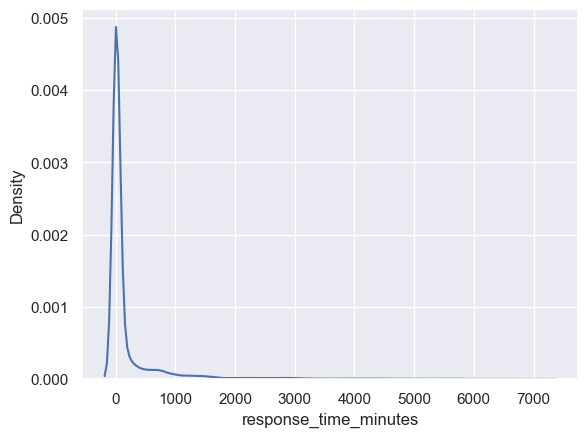

In [54]:
 sb.kdeplot(data=df, x="response_time_minutes")

<AxesSubplot:xlabel='response_time_minutes'>

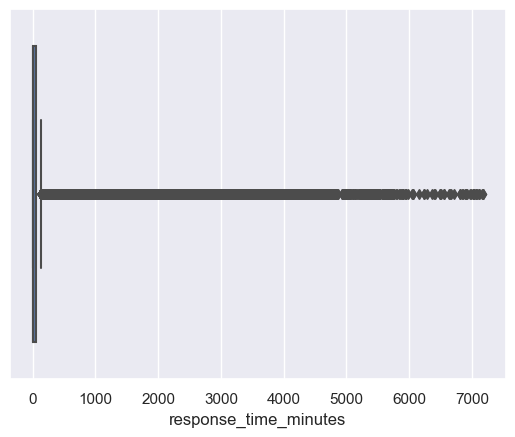

In [55]:
sb.boxplot(data=df, x="response_time_minutes",orient = 'h')


<AxesSubplot:xlabel='response_time_minutes'>

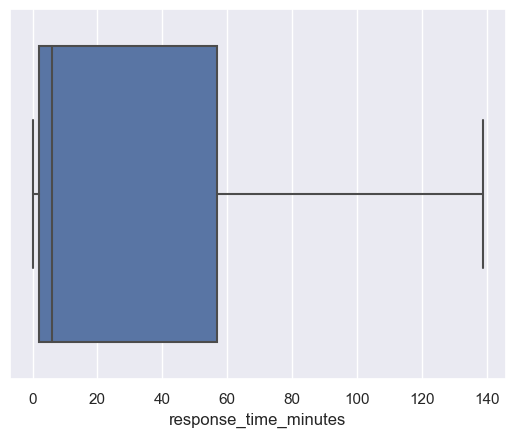

In [56]:
sb.boxplot(data=df, x="response_time_minutes",orient = 'h',showfliers=False)

In [57]:
df[df["response_time_minutes"]<60].count()

Unique id                64659
channel_name             64659
category                 64659
Sub-category             64659
Customer Remarks         22151
order_date_time          11359
Issue_reported at        64659
issue_responded          64659
Survey_response_Date     64659
Product_category         11359
Item_price               11359
Agent_name               64659
Supervisor               64659
Manager                  64659
Tenure Bucket            64659
Agent Shift              64659
CSAT Score               64659
Order_made               64659
remarks_length           64659
response_time_minutes    64659
dtype: int64

The distribution for response_time_minutes appear to have an extreme positive skew, we will leave it like this for now and deal with this skew issue later if needed during the EDA.

In [58]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0.0,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0.0,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0.0,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0.0,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0.0,2.0


Drop "Unique id", "order_date_time", "Issue_report" at and "issue_responded" and "Survery_response_Date"

In [59]:
df = pd.DataFrame(df.drop("Unique id",axis=1))
df.sample(5)

,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
84379,Email,Order Related,Delayed,NaN,21/08/2023 13:49,2023-08-30 19:39:00,2023-08-31 18:41:00,2023-08-31,Home,149.0,Katrina Mendoza,Emma Park,John Smith,31-60,Morning,3,1,0.0,1382.0
7003,Inbound,Payments related,Wallet related,NaN,NaN,2023-08-03 12:50:00,2023-08-03 12:51:00,2023-08-03,NaN,NaN,Katrina Mendoza,Emma Park,John Smith,31-60,Morning,5,0,0.0,1.0
22924,Inbound,Shopzilla Related,Signup Issues,Okay,NaN,2023-08-08 11:53:00,2023-08-08 19:10:00,2023-08-08,NaN,NaN,Amanda Sloan,Elijah Yamaguchi,John Smith,>90,Evening,4,0,4.0,437.0
61775,Inbound,Product Queries,Product Specific Information,NaN,NaN,2023-08-23 16:01:00,2023-08-23 16:02:00,2023-08-23,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4,0,0.0,1.0
52042,Inbound,Returns,Wrong,NaN,NaN,2023-08-20 17:06:00,2023-08-20 17:08:00,2023-08-20,NaN,NaN,Linda Butler,Charlotte Suzuki,Jennifer Nguyen,On Job Training,Evening,4,0,0.0,2.0


In [60]:
df = pd.DataFrame(df.drop(["order_date_time","Issue_reported at","issue_responded","Survey_response_Date"],axis=1))
df.sample(5)

,channel_name,category,Sub-category,Customer Remarks,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
69740,Inbound,Product Queries,Product Specific Information,NaN,NaN,NaN,Christopher Chan,Ava Wong,Jennifer Nguyen,On Job Training,Morning,5,0,0.0,3.0
43814,Inbound,Order Related,Delayed,NaN,NaN,NaN,Julie Williams,Zoe Yamamoto,William Kim,On Job Training,Morning,1,0,0.0,2.0
82605,Inbound,Product Queries,Product Specific Information,NaN,NaN,NaN,William Carey DVM,William Park,John Smith,61-90,Evening,5,0,0.0,292.0
34741,Inbound,Returns,Exchange / Replacement,NaN,NaN,NaN,Jamie Smith,Scarlett Chen,John Smith,0-30,Morning,1,0,0.0,15.0
72869,Inbound,Returns,Reverse Pickup Enquiry,This product is wrong size send me Total numbe...,NaN,NaN,Melissa Nelson,Austin Johnson,William Kim,On Job Training,Morning,1,0,148.0,5.0


The dataset is relatively cleaned now, we will split the data set into 3 different sets
1. both with order made
2. with order made
3. without order made

In [61]:
df1 = pd.DataFrame(df)
df2 = pd.DataFrame(df[df["Order_made"]==1])
df3 = pd.DataFrame(df[df["Order_made"]==0])

In [62]:
df_supervisor = df1.groupby("Supervisor").agg({
    "CSAT Score": ["mean", "min", "max", "median", "count"],
    "response_time_minutes": ["mean", "min", "max", "median"]
}).reset_index()

df_supervisor.columns = ["name", 
                         "avg_csat", "min_csat", "max_csat", "median_csat", "survey_count", 
                         "avg_response_time","min_response_time","min_response_time","median_response_time"]


In [63]:
df_manager = df1.groupby("Manager").agg({
    "CSAT Score": ["mean", "min", "max", "median", "count"],
    "response_time_minutes": ["mean", "min", "max", "median"]
}).reset_index()

df_manager.columns = ["name", 
                         "avg_csat", "min_csat", "max_csat", "median_csat", "survey_count", 
                         "avg_response_time","min_response_time","min_response_time","median_response_time"]


In [64]:
df_agent = df1.groupby("Agent_name").agg({
    "CSAT Score": ["mean", "min", "max", "median", "count"],
    "response_time_minutes": ["mean", "min", "max", "median"]
}).reset_index()

df_agent.columns = ["name", 
                         "avg_csat", "min_csat", "max_csat", "median_csat", "survey_count", 
                         "avg_response_time","min_response_time","min_response_time","median_response_time"]


In [65]:
df_supervisor

,name,avg_csat,min_csat,max_csat,median_csat,survey_count,avg_response_time,min_response_time,min_response_time,median_response_time
0,Abigail Suzuki,4.273300,1,5,5.0,2221,174.970284,0.0,5695.0,6.0
1,Aiden Patel,4.293670,1,5,5.0,2891,176.450363,0.0,6963.0,6.0
2,Alexander Tanaka,4.186364,1,5,5.0,1320,211.719697,0.0,7010.0,7.0
3,Amelia Tanaka,4.311079,1,5,5.0,1363,231.721203,0.0,5489.0,7.0
4,Austin Johnson,4.115563,1,5,5.0,1722,187.500000,0.0,5442.0,7.0
5,Ava Wong,4.169582,1,5,5.0,3373,190.674770,0.0,5906.0,7.0
6,Brayden Wong,4.325984,1,5,5.0,2540,199.740945,0.0,5950.0,6.0
7,Carter Park,4.252809,1,5,5.0,4272,183.610721,0.0,7067.0,6.0
8,Charlotte Suzuki,4.089590,1,5,5.0,1172,215.979522,0.0,5982.0,9.0
9,Dylan Kim,4.072742,1,5,5.0,1196,181.011706,0.0,4703.0,7.0


<AxesSubplot:xlabel='avg_csat', ylabel='Density'>

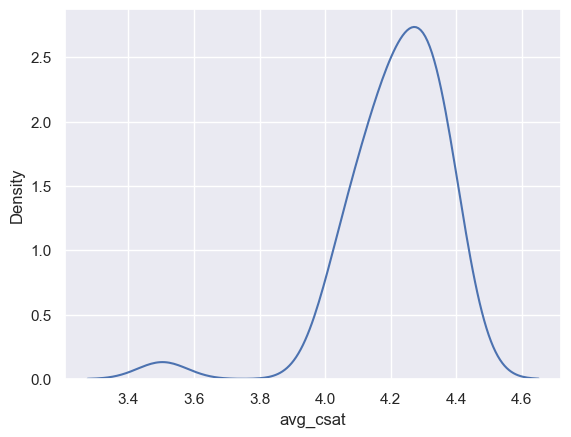

In [66]:
sb.kdeplot(data=df_supervisor,x="avg_csat")

<AxesSubplot:xlabel='avg_csat', ylabel='Density'>

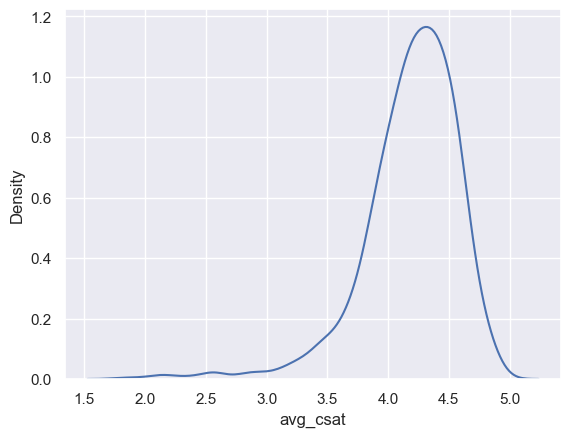

In [67]:
sb.kdeplot(data=df_agent,x="avg_csat")

<AxesSubplot:xlabel='avg_csat', ylabel='Density'>

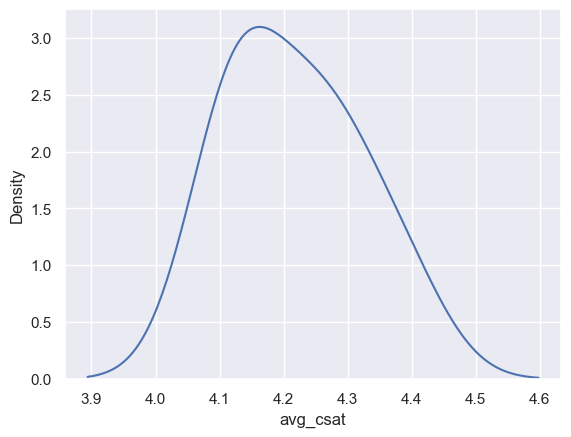

In [68]:
sb.kdeplot(data=df_manager,x="avg_csat")

In [69]:
csat_avg_sorted = df_agent.sort_values(by="avg_csat",ascending=False)
top10_agent = csat_avg_sorted.head(10)
top10_agent

,name,avg_csat,min_csat,max_csat,median_csat,survey_count,avg_response_time,min_response_time,min_response_time,median_response_time
1016,Pamela Robinson,4.956522,4,5,5.0,23,231.565217,1.0,3355.0,5.0
1338,Virginia Lane,4.909910,4,5,5.0,111,97.738739,0.0,2131.0,4.0
1164,Sean Gay,4.909091,4,5,5.0,22,24.136364,2.0,118.0,5.0
1253,Taylor Nelson,4.888889,1,5,5.0,45,88.111111,0.0,645.0,3.0
977,Nancy Singh,4.868421,4,5,5.0,38,59.578947,0.0,766.0,4.5
102,Anthony Sims,4.868421,3,5,5.0,38,203.736842,0.0,2794.0,7.5
956,Morgan Smith,4.866667,4,5,5.0,45,140.911111,0.0,2375.0,3.0
596,John Hoffman,4.861111,4,5,5.0,36,65.083333,1.0,497.0,5.0
704,Kelly Thomas,4.857143,3,5,5.0,63,122.936508,0.0,2425.0,7.0
1002,Nicole Simpson DVM,4.850000,4,5,5.0,20,62.400000,1.0,825.0,4.5


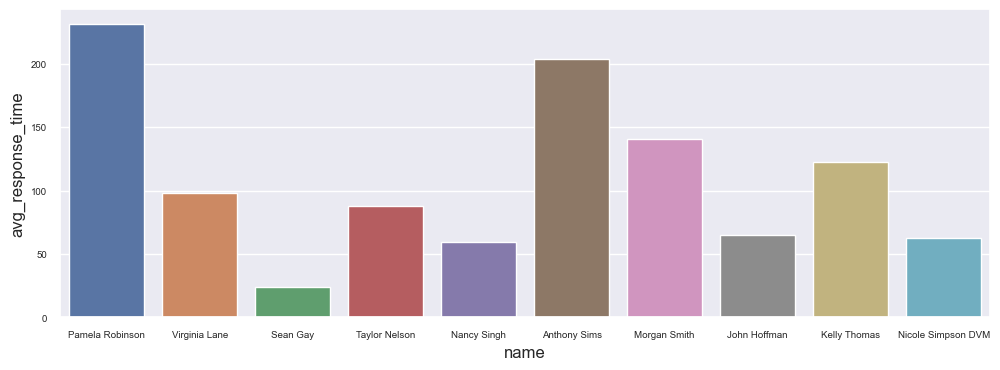

In [70]:
f=plt.figure(figsize=(12,4))
g=sb.barplot(data=top10_agent,x="name",y="avg_response_time")
plt.tick_params(axis='both', which='major', labelsize=7)

In [71]:
bottom10_agent = csat_avg_sorted.tail(10)
bottom10_agent

,name,avg_csat,min_csat,max_csat,median_csat,survey_count,avg_response_time,min_response_time,min_response_time,median_response_time
1317,Veronica Anderson,2.542857,1,5,1.0,35,271.200000,0.0,4246.0,8.0
1300,Tommy Davies,2.416667,1,5,1.0,36,236.055556,1.0,2920.0,7.0
1015,Pamela Perez,2.382353,1,5,1.0,34,66.852941,0.0,754.0,8.5
1348,Wesley Meyer,2.259259,1,5,1.0,27,97.037037,0.0,1356.0,9.0
209,Charles Morales,2.205882,1,5,1.0,34,258.470588,0.0,4491.0,16.5
1004,Nicole Zavala,2.133333,1,5,1.0,30,429.666667,0.0,3546.0,41.0
1339,Virginia Mccormick,2.114286,1,5,1.0,35,650.428571,1.0,5899.0,34.0
281,Curtis Mccarthy,2.100000,1,5,1.0,30,321.100000,1.0,2546.0,23.5
1063,Rebecca Miller,1.954545,1,5,1.0,22,50.227273,0.0,376.0,12.0
1045,Philip Harmon,1.809524,1,5,1.0,21,352.809524,0.0,2003.0,12.0


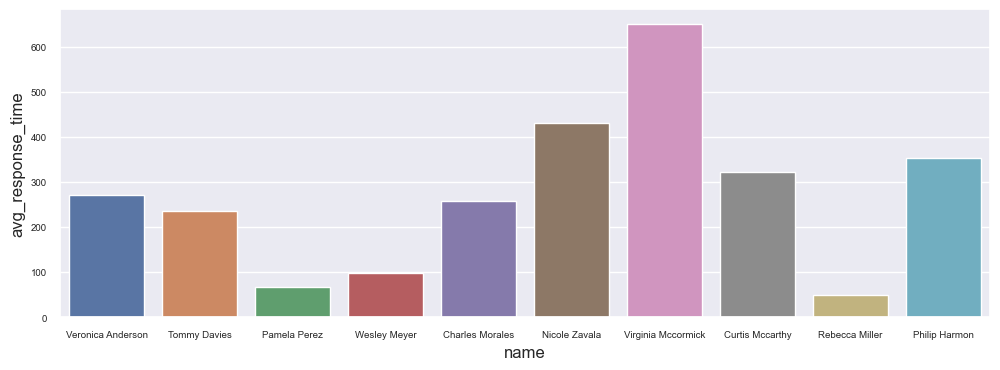

In [72]:
f=plt.figure(figsize=(12,4))
g=sb.barplot(data=bottom10_agent,x="name",y="avg_response_time")
plt.tick_params(axis='both', which='major', labelsize=7)

We can rank the employee's performance however, we do not want to discriminate the employee and apply predictive model using more objective data such as their tenure bucket, their names is irrelevant.\
So we remove Supervisor, Manager and Agent_name


In [73]:
df1 = pd.DataFrame(df1.drop(["Supervisor","Manager","Agent_name"],axis = 1))
df2 = pd.DataFrame(df2.drop(["Supervisor","Manager","Agent_name"],axis = 1))
df3 = pd.DataFrame(df3.drop(["Supervisor","Manager","Agent_name"],axis = 1))

In [74]:
df1.sample(8)

,channel_name,category,Sub-category,Customer Remarks,Product_category,Item_price,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
45843,Inbound,Product Queries,Product Specific Information,NaN,NaN,NaN,>90,Afternoon,5,0,0.0,3196.0
62377,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,>90,Morning,5,0,0.0,3.0
23563,Inbound,Order Related,Order status enquiry,You should improve your delivery contact way.,NaN,NaN,31-60,Evening,5,0,45.0,116.0
68814,Inbound,Order Related,Order status enquiry,NaN,Home,198.0,On Job Training,Morning,2,1,0.0,23.0
19323,Inbound,Refund Related,Refund Related Issues,Please resolve my issue fast,Electronics,35890.0,61-90,Morning,4,1,28.0,6.0
34369,Outcall,Returns,Return request,NaN,Electronics,1599.0,31-60,Evening,2,1,0.0,163.0
65615,Outcall,Payments related,Online Payment Issues,NaN,NaN,NaN,>90,Morning,3,0,0.0,30.0
82875,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,On Job Training,Evening,5,0,0.0,4.0


## What remains:

Categorical nominal attributes:\
channel_name \
category\
Sub-category\
Agent shift


Categorical ordinal attributes:\
Tenure Bucket\
*CSAT Score* <---- our response

Numerical continuous attribute:\
remarks_length\
response_time_minutes

Unstructured:
Customer Remarks

Extract data for EDA part

In [75]:
df1.to_csv('data_both_EDA.csv',index = False)
df2.to_csv('data_order_EDA.csv', index = False) 
df3.to_csv('data_noorder_EDA.csv', index = False)